In [1]:
# Import pymsg

import sys
import os
sys.path.insert(0, os.path.join(os.environ['MSG_DIR'], 'lib'))
import pymsg

# Import standard modules and configure them

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
import h5py
from scipy import interpolate as inp
from scipy.integrate import quad as integrate
from scipy.special import legendre, lpmv, sph_harm
from scipy.optimize import fsolve

import f90nml as nml
from shutil import copyfile

from PyAstronomy import pyasl
from astropy.io import ascii
import ipywidgets as ipw

In [66]:
class player:
    
    def __init__ (self, name, circle_order):
        
        self.name = name
        
        self.rankings = self.rankings_from_order( circle_order )
        
    def __repr__(self):
        circle_order = list(self.rankings.keys())
        return f"player {self.name} rankings: {circle_order}"

    def __str__(self):
        circle_order = list(self.rankings.keys())
        return f"player {self.name} rankings: {circle_order}"
        
            
    def rankings_from_order (self, circle_order):
        
        circle_list = circle_order.split(',')
        circle_size = len(circle_list)
        circle_rankings = {}
        
        for i,p in enumerate(circle_list):
            circle_rankings[p] = circle_size-i
        
        return circle_rankings

In [105]:
A = player('A','B,C,G,F,D,E')
B = player('B','C,A,G,D,F,E')
C = player('C','A,B,G,F,D,E')

D = player('D','F,G,B,E,C,A')
E = player('E','G,B,C,F,D,A')
F = player('F','G,A,B,D,F,E')
G = player('G','F,B,C,E,A,D')

In [106]:
def score(players):
    
    circle = list(players[0].rankings.keys()) + [players[0].name]
    
    circle_rankings = {x.name:0 for x in players}
    
    for x in players:
        for p in x.rankings:
            circle_rankings[p] += x.rankings[p]
            
    print(circle_rankings)

In [107]:
score([A,B,C,D,E,F,G])

{'A': 20, 'B': 29, 'C': 21, 'D': 13, 'E': 10, 'F': 25, 'G': 29}


Text(0.5, 0.01, 'phase (P=29.1338 d)')

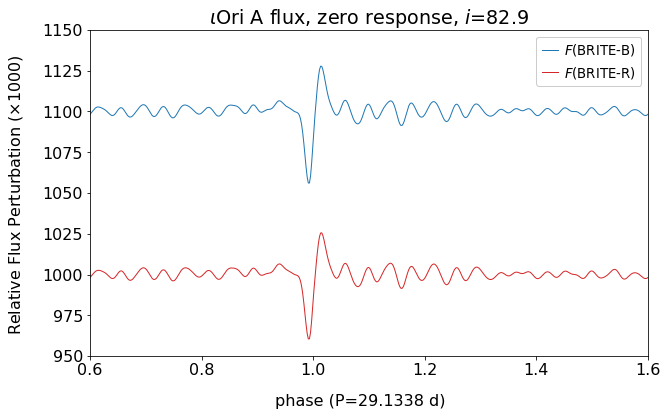

In [157]:
# Plot
#fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize=(10,6))#, dpi=100)

#ax.plot(t*omega_orb, (flux_1 + 1.1)*1000, c='C0', lw=1, label=r'$F$(BRITE-B)')

#ax.set_xlim(0.6,1.6)
#ax.set_ylim(0.95*1000,1.15*1000)

#legend_style = {'framealpha':1.0, 'handlelength':1.2, 'handletextpad':0.5, 'fontsize':'small'}
#ax.legend(loc=1, **legend_style)

#ax.set_title(f'$\iota$Ori A flux, zero response, $i$={inc}')

#fig.text(0.01, 0.5, r'Relative Flux Perturbation ($\times 1000$)', va='center', rotation='vertical')
#fig.text(0.5, 0.01, f"phase (P={1./omega_orb:4.4f} d)", ha='center')

#fig.savefig(f'iOri_R_reflections.png')